# **Automatidata project**
**Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.


# Building a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**



## PACE: **Plan**



### Imports and loading

In [1]:
# Imports
# Packages for numerics + dataframes
import numpy as np
import pandas as pd

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 


## PACE: **Analyze**



### Explore data with EDA

Analyzing and discovering data, looking for correlations, missing data, outliers, and duplicates.

Starting with `.shape` and `.info()`.

In [3]:
# Reverting `df` to `df0`
df = df0.copy()

# Displaying the dataset's shape
print(df.shape)

# Displaying basic info about the dataset
df.info()



(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [4]:
# Checking for missing data and duplicates using .isna() and .drop_duplicates()

# Checking for duplicates
print('shape of dataframe:', df.shape)
print('shape of dateframe with duplicates dropped:', df.drop_duplicates().shape)

# Checking for msiing values in dataframe
print('Total count of missing values:', df.isna().sum().sum())

# Displaying missing values per column in dataframe
print('Missing values per column:')
df.isna().sum()

shape of dataframe: (22699, 18)
shape of dateframe with duplicates dropped: (22699, 18)
Total count of missing values: 0
Missing values per column:


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Use `.describe()`.

In [6]:
# Displaying descriptive stats about the data
df.describe()


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


Several notable observations can be made from this summary statistics table. Firstly, there are evident outliers present in various variables, notably in `tip_amount` (\$200) and `total_amount` (\$1,200). Additionally, some variables like  `mta_tax`, appear to have nearly constant values throughout the dataset, suggesting that they might not contribute significantly to predictive modeling.






###  Convert pickup & dropoff columns to datetime


In [7]:
# Checking the format of the data
df['tpep_dropoff_datetime'][0]


'03/25/2017 9:09:47 AM'

In [10]:
# Converting datetime columns to datetime

# Displaying data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

# Converting 'tpep_pickup_datetime' to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Displaying data types of 'tpep_pickup_datetime', 'tpep_dropoff_datetime'
print('Date type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_dateime:', df['tpep_dropoff_datetime'].dtype)

# Convert the date/time columns to datetime data type
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df.head(5)

Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]
Date type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_dateime: datetime64[ns]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


### Create duration column

Creating a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [11]:
# Creating `duration` column by subtracting pickup time from dropoff time
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit the model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



###  Box plots

Plotting a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

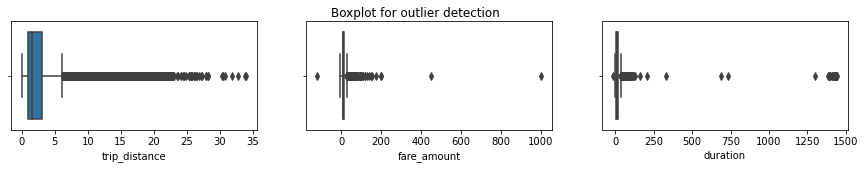

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplot for outlier detection')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show()


All three variables exhibit outliers, with varying degrees of extremeness. While the distances in this column, such as the 30-mile span from the southern tip of Staten Island to the northern end of Manhattan in a straight line, seem reasonable given the distribution of values, it may be best to leave them unaltered. However, it is apparent that fare_amount and duration have noticeably problematic outliers, particularly on the higher side. It may be acceptable to consider addressing the outliers in trip_distance, although this might not be as critical for the other two variables.

###  Imputations

#### `trip_distance` outliers

From the summary statistics that there are trip distances of 0. 

To check, I'll sort the column values, eliminate duplicates, and inspect the least 10 values.

In [14]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df['trip_distance']))[:10]


[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculating the count of rides where the `trip_distance` is zero.

In [15]:
sum(df['trip_distance']==0)

148

With only 148 out of approximately 23,000 rides being affected, this proportion is relatively minor. It's possible to fill these instances with a value like 0.01, but it's doubtful that this adjustment would substantially impact the model's performance. As a result, there is no need to make any alterations to the trip_distance column in relation to outliers.

#### `fare_amount` outliers

In [16]:
df['fare_amount'].describe()


count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

The fare_amount column exhibits a wide range of values, with some extreme values that lack logical explanations.


* **Low values:** Negative values are problematic. Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.

* **High values:** The maximum fare amount in this dataset is nearly \\$1,000, which seems very unlikely. High values for this feature can be capped based on intuition and statistics. The interquartile range (IQR) is \\$8. The standard formula of `Q3 + (1.5 * IQR)` yields \\$26.50. That doesn't seem appropriate for the maximum fare cap. In this case, we'll use a factor of `6`, which results in a cap of \\$62.50.



Impute values less than $0 with `0`.

In [17]:
# Imputing values less than $0 with 0
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df['fare_amount'].min()

0.0

Imputing the maximum value as `Q3 + (6 * IQR)`.

In [18]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassigning minimum to zero
        df.loc[df[col] < 0, col] =0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassigning values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

#### `duration` outliers


In [19]:
# Call .describe() for duration outliers
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



In [21]:
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [25]:
# Imputing a 0 for any negative values
df.loc[df['duration'] < 0, 'duration'] = 0
df['duration'].min()

0.0

In [24]:
# Imputing the high outliers
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



### Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, I'll create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if my data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

 All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


I'll begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [27]:
# Creating `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(2)

0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

I'll use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [28]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


`grouped` is an object of the `DataFrame` class.

1. I'll convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assigning the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassigning the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, getting rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [32]:
# 1. Converting `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassigning to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

In [34]:
# 1. Creating a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# 2. Mapping `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirming that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]


,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


#### Create `mean_duration` column

I'll repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [36]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]

# Creating a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirming that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


#### Create `day` and `month` columns

Creating two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [39]:
# Creating 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Creating 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Creating a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [44]:
# Creating 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturdsay', 'sunday']), 'rush_hour'] = 0

In [43]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val


In [45]:
# Applying the `rush_hourizer()` function to the new column
df['rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,1
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0


###  Scatter plot

Creating a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

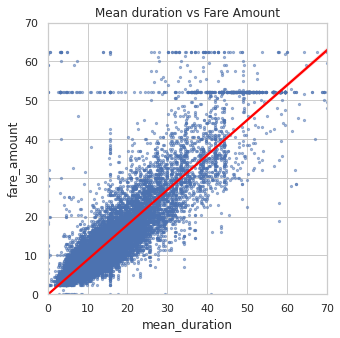

In [46]:
# Creating a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style = 'whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
           scatter_kws={'alpha':0.5, 's':5},
           line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration vs Fare Amount')
plt.show()


The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [47]:
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

There are 514 trips whose fares were $52.

Examining the first 30 of these trips.

In [48]:
# Setting pandas to display all columns
pd.set_option('display.max_columns', None)
df[df['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,apr,0


It appears that nearly all of the trips in the initial 30 rows, where the fare amount equals \\$52, either originate or terminate at location 132, and all of them are associated with a RatecodeID of 2.

There isn't an immediately obvious explanation for why PULocation 132 has such a high frequency of \\$52 fares. These fares seem to occur on various days, at different times, involving both vendors, across all months. However, there are numerous toll amounts recorded as \\$5.76 and \\$5.54, which suggests that location 132 is likely in an area that frequently requires toll payments for travel to and from it. It's highly probable that this location represents an airport.

According to the data dictionary, RatecodeID 2 corresponds to trips for JFK, which stands for John F. Kennedy International Airport. A brief online search for 'New York City taxi flat rate \\$52' reveals that in 2017 (the year this data was collected), there was indeed a fixed fare for taxi trips between JFK airport in Queens and Manhattan.

Since RatecodeID is defined in the data dictionary, the values associated with this rate code can be restored to the data after the model generates its predictions. This approach ensures that those data points will consistently reflect the correct information."

###  Isolate modeling variables

Dropping features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [50]:
df2 = df.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


###  Pair plot

Creating a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

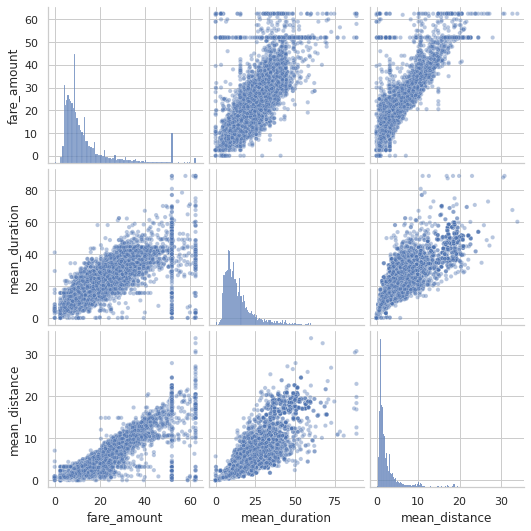

In [51]:
# Creating a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
            plot_kws={'alpha':0.4, 'size':5},
            )

These variables all show linear correlation with each other. 

Investigating this further.

###  Identify correlations

In [67]:
# Correlation matrix to help determine most correlated variables
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.007689
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.012193
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.021655
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039608
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.025496
rush_hour,-0.007689,-0.012193,-0.021655,-0.039608,-0.025496,1.000000


Visualizing a correlation heatmap of the data.

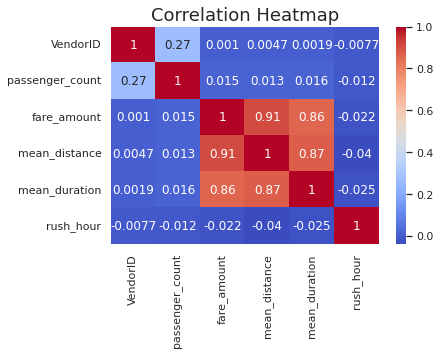

In [56]:
# Creating correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', 
          fontsize=18)
plt.show()


The variables mean_duration and mean_distance show strong correlations with the target variable fare_amount. They are also closely correlated with each other, with a Pearson correlation coefficient of 0.87.

It's important to note that having highly correlated predictor variables can pose challenges for linear regression models when the goal is to draw statistical insights from the model. However, even in such cases, correlated predictor variables can still be valuable if the primary aim is accurate prediction rather than using the model for data exploration purposes.

In this context, the model's primary purpose is to predict fare_amount, which will serve as a predictor variable in machine learning models.


## PACE: **Construct**



### Split data into outcome variable and features

In [53]:
df2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


Set  X and y variables. X represents the features and y represents the outcome (target) variable.

In [57]:
# Removing the target column from the features
X = df2.drop(columns='fare_amount')


# Setting y variable
y = df2[['fare_amount']]

# Displaying first few rows
X.head()


,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,1
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


###  Pre-process data


Dummy encode categorical variables

In [59]:
# Converting VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Getting dummies
X = pd.get_dummies(X, drop_first=True)
X.head()


,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,1,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


### Split data into training and test sets

Creating training and testing sets. The test set will contain 20% of the total samples. Setting `random_state=0`.

In [61]:
# Creating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Standardize the data

Using `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assigning the results to a variable called `X_train_scaled`.

In [64]:
# Standardizing the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.50301524  0.8694684   0.17616665 -0.7241748   0.89286563]
 [-0.50301524 -0.60011281 -0.69829589  1.38088207  0.89286563]
 [ 0.27331093 -0.47829156 -0.57301906 -0.7241748  -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.6788917  -0.7241748  -1.11998936]
 [-0.50301524 -0.58944763 -0.85743597  1.38088207 -1.11998936]
 [ 1.82596329  0.83673851  1.13212101 -0.7241748   0.89286563]]


### Fit the model

Instantiating my model and fitting it to the training data.

In [65]:
# Fitting my model to the training data
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluate model

### Train data

Evaluating my model performance by calculating the residual sum of squares and the explained variance score (R^2). I'll calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [68]:
# Evaluating the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))



Coefficient of determination: 0.8398206516011186
R^: 0.8398206516011186
MAE: 2.187539211991087
MSE: 17.89228052981124
RMSE: 4.229926775939655


The regression model appears to have a reasonably good fit to the data, as indicated by the relatively high R-squared value and the low MAE, MSE, and RMSE values.

### Test data


In [69]:
# Scaling the X_test data
X_test_scaled = scaler.transform(X)

In [70]:
# Evaluating the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))



Coefficient of determination: 0.8682574236190405
R^2: 0.8682574236190405
MAE: 2.133692619655181
MSE: 14.326556439750123
RMSE: 3.7850437830691104


The model exhibits strong performance on both the training and test datasets, indicating that it is not biased and avoids overfitting. Interestingly, the test results were slightly superior.

On the test data, an R-squared value of 0.868 implies that the model accounts for approximately 86.8% of the variability in the fare_amount variable.

The mean absolute error (MAE) is particularly insightful in this context since, within the model's context, an error of two is not twice as detrimental as an error of one.

## PACE: **Execute**


### Results



In [74]:
# Creating a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                            'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()



,actual,predicted,residual
5818,14.0,12.358422,1.641578
18134,28.0,16.318083,11.681917
4655,5.5,6.727514,-1.227514
7378,15.5,16.228485,-0.728485
13914,9.5,10.535880,-1.035880


###  Visualize model results

Creating a scatterplot to visualize `actual` vs. `predicted`.

Text(0.5, 1.0, 'Actual vs. Predicted')

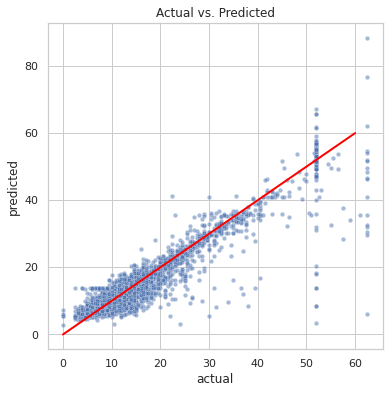

In [77]:
# Creating a scatterplot to visualize `predicted` over `actual`
fid, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)

plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. Predicted')

Visualize the distribution of the `residuals` using a histogram.

Text(0, 0.5, 'count')

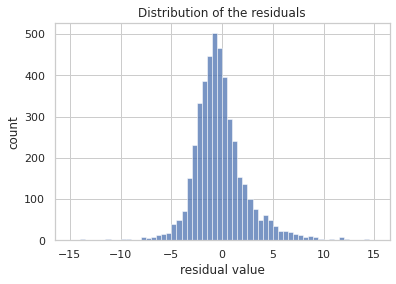

In [85]:
# Visualizing the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count')



In [79]:
# Calculating residual mean
results['residual'].mean()

-0.015849086149861562

The residuals follow a normal distribution with an average of -0.015. Residuals capture the unexplained variation in the outcome variable by the model. A normal distribution centered around zero is favorable because it indicates that the model's errors are uniformly distributed and impartial.






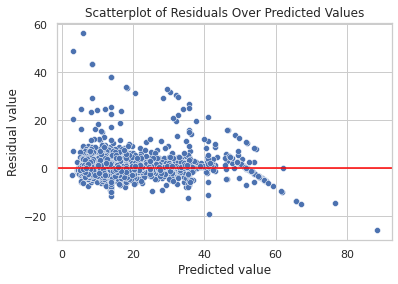

In [88]:
# Creating a scatterplot of `residuals` over `predicted`
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of Residuals Over Predicted Values')
plt.xlabel('Predicted value')
plt.ylabel('Residual value')
plt.show()


The residuals of the model are uniformly spread both above and below zero, except for the diagonal lines extending from the upper-left corner to the lower-right corner. These lines correspond to the imputed maximum fare of \\$62.50 and the flat rate of \\$52 for JFK airport trips.

###  Coefficients


In [90]:
# Outputing the model's coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.029327,7.131662,2.814206,0.097935,-0.053524


The coefficients indicate that mean_distance had the most significant influence on the model's final prediction. However, it's essential to clarify that a common misinterpretation is to assume that for every mile traveled, the fare amount increases by an average of \\$7.13. This interpretation is incorrect because the data used for model training was standardized using StandardScaler(). Consequently, the units are no longer in miles. In other words, you cannot make the statement "for every mile traveled..." as mentioned above. The accurate interpretation of this coefficient is that, while controlling for other variables, for every +1 change in standard deviation, the fare amount increases by a mean of \\$7.13.

Because some highly correlated features were not removed, the confidence interval of this assessment is wider.

So, I'll translate this back to miles instead of standard deviation. And I'll 

1. Calculate the standard deviation of `mean_distance` in the `X_train` data.

2. Divide the coefficient (7.133867) by the result to yield a more intuitive interpretation.

In [92]:
# 1. Calculate SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print(7.133867 / X_train['mean_distance'].std())

3.574812975256415
1.9955916713344426


On average, for every 3.57 miles of travel, the fare increased by \\$7.13. To put it more simply, for every 1 mile traveled, the fare went up by an average of \\$2.00.

###  Conclusion


Multiple linear regression is a robust technique for predicting a continuous dependent variable based on multiple independent variables.

Exploratory data analysis plays a crucial role in the selection of both numeric and categorical features for multiple linear regression models.

Building accurate models with multiple linear regression may involve some trial and error as you aim to find the right combination of variables while considering model assumptions, although this might not be necessary in all cases, depending on your specific needs.




You can discuss meeting linear regression assumptions, and you can present the MAE and RMSE scores obtained from the model.